## Initial Simulations

A straightforward way to initiate analysis of how the models might differentially handle item repetitions is to measure how the probability of recalling an item given a static contextual cue changes as the item is repeatedly encoded. We expect it to increase linearly (by $x^{\tau}$) with respect to `InstanceCMR`, but exponentially within `CMR`. If this reasoning survives scrutiny, that's a big deal.

Parameters, contextual cue, and repeated item shouldn't matter here. We'll try to set them to values that aren't distracting and vary them to ensure our simulation results aren't contingent on any particular configuration.

In [3]:
#%env NUMBA_DISABLE_JIT 1

from instance_cmr.models import *
from instance_cmr.model_analysis import *
import numpy as np
import matplotlib.pyplot as plt

experiment_count = 1000

### InstanceCMR With Instance-Based Choice Sensitivity

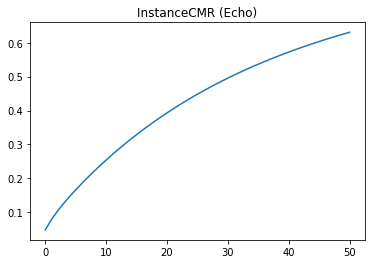

In [14]:
# selected parameters
free_parameters = [
    'encoding_drift_rate',
    'start_drift_rate',
    'recall_drift_rate',
    'shared_support',
    'item_support',
    'learning_rate',
    'primacy_scale',
    'primacy_decay',
    'stop_probability_scale',
    'stop_probability_growth',
    'choice_sensitivity',
    'context_sensitivity',
    'feature_sensitivity']

result = [8.13747983e-01, 6.27998882e-03, 9.72598264e-01, 9.27475781e-04,
       3.18670579e-01, 3.57189132e-02, 1.03657413e+01, 5.36018883e+01,
       3.16992419e-02, 3.35561099e-01, 1, 9.28861441e-01, 1]
parameters = {
    'item_count': 20,
    'presentation_count': 70
}

for i in range(len(free_parameters)):
    parameters[free_parameters[i]] = result[i] 

results = np.zeros((experiment_count, 1+parameters['presentation_count']-parameters['item_count']))

for experiment in range(experiment_count):
    # arbitrary item and contextual cue
    repeated_item = np.random.randint(parameters['item_count'])
    cue = np.concatenate((np.zeros(parameters['item_count']+1), np.random.rand(parameters['item_count']+1)))

    # initialize model
    model = InstanceCMR(**parameters)
    model.experience(np.eye(parameters['item_count'], parameters['item_count'] + 1, 1))
    results[experiment, 0] = model.outcome_probabilities(cue)[repeated_item+1]
    
    # track outcome probability of selected item as it is repeatedly encoded
    for i in range(parameters['presentation_count']-parameters['item_count']):
        
        model.experience(np.eye(parameters['item_count'], parameters['item_count'] + 1, 1)[repeated_item:repeated_item+1])
        
        # cue = np.concatenate((np.zeros(parameters['item_count']+1), model.context)) # for when i want context to be the cue
        results[experiment, i+1] = model.outcome_probabilities(cue)[repeated_item+1]

# plot an example trial    
#print('repeated item:\n', repeated_item, np.eye(parameters['item_count'], parameters['item_count'] + 1, 1)[repeated_item:repeated_item+1])
#print('cue:\n', cue)
#print('outcome probability for repeated item:\n', results[-1])
#plot_states(model.memory, "memory")

plt.plot(np.mean(results, axis=0))
plt.title('InstanceCMR (Echo)')
plt.show()

### InstanceCMR With Instance-Based Choice Sensitivity

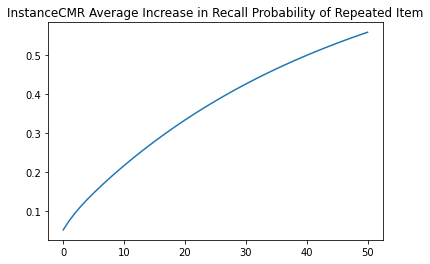

In [10]:
# selected parameters
parameters = {
    'item_count': 20,
    'presentation_count': 70,
    'encoding_drift_rate': 7.90931647e-01,
    'start_drift_rate': 7.87233205e-03,
    'recall_drift_rate': 9.48041056e-01,
    'shared_support': 8.09406715e-04,
    'item_support': 8.11152335e-01,
    'learning_rate': 6.66612122e-02,
    'primacy_scale': 2.08401190e+01,
    'primacy_decay': 8.51443053e+01,
    'stop_probability_scale': 2.86499753e-02,
    'stop_probability_growth': 2.92199457e-01,
    'choice_sensitivity': 1,
    'context_sensitivity': 1,
    'feature_sensitivity': 8.44628821e-01,
}

results = np.zeros((experiment_count, 1+parameters['presentation_count']-parameters['item_count']))

for experiment in range(experiment_count):
    # arbitrary item and contextual cue
    repeated_item = np.random.randint(parameters['item_count'])
    cue = np.concatenate((np.zeros(parameters['item_count']+1), np.random.rand(parameters['item_count']+1)))

    # initialize model
    model = InstanceCMR(**parameters)
    model.experience(np.eye(parameters['item_count'], parameters['item_count'] + 1, 1))
    results[experiment, 0] = model.outcome_probabilities(cue)[repeated_item+1]
    
    # track outcome probability of selected item as it is repeatedly encoded
    for i in range(parameters['presentation_count']-parameters['item_count']):
        
        model.experience(np.eye(parameters['item_count'], parameters['item_count'] + 1, 1)[repeated_item:repeated_item+1])
        
        # cue = np.concatenate((np.zeros(parameters['item_count']+1), model.context)) # for when i want context to be the cue
        results[experiment, i+1] = model.outcome_probabilities(cue)[repeated_item+1]

# plot an example trial    
#print('repeated item:\n', repeated_item, np.eye(parameters['item_count'], parameters['item_count'] + 1, 1)[repeated_item:repeated_item+1])
#print('cue:\n', cue)
#print('outcome probability for repeated item:\n', results[-1])
#plot_states(model.memory, "memory")

plt.plot(np.mean(results, axis=0))
plt.title('InstanceCMR Average Increase in Recall Probability of Repeated Item')
plt.show()

### InstanceCMR With Echo-Based Choice Sensitivity

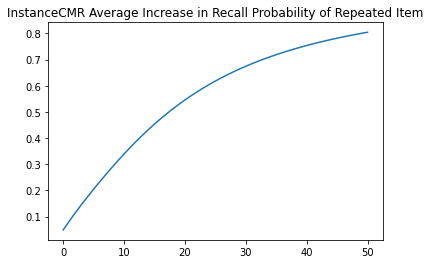

In [12]:
# selected parameters
parameters = {
    'item_count': 20,
    'presentation_count': 70,
    'encoding_drift_rate': 7.35396287e-01,
    'start_drift_rate': 1.87003498e-02,
    'recall_drift_rate': 9.02468034e-01,
    'shared_support': 4.02430122e-03,
    'item_support': 1.00000000e+00,
    'learning_rate':  1.10964824e-01,
    'primacy_scale': 1.01153545e+01,
    'primacy_decay': 7.00452937e+01,
    'stop_probability_scale': 3.45770082e-02,
    'stop_probability_growth': 2.57315752e-01,
    'choice_sensitivity': 1.27029929e+00,
    'context_sensitivity': 1,
    'feature_sensitivity': 1,
}

results = np.zeros((experiment_count, 1+parameters['presentation_count']-parameters['item_count']))

for experiment in range(experiment_count):
    # arbitrary item and contextual cue
    repeated_item = np.random.randint(parameters['item_count'])
    cue = np.concatenate((np.zeros(parameters['item_count']+1), np.random.rand(parameters['item_count']+1)))

    # initialize model
    model = InstanceCMR(**parameters)
    model.experience(np.eye(parameters['item_count'], parameters['item_count'] + 1, 1))
    results[experiment, 0] = model.outcome_probabilities(cue)[repeated_item+1]
    
    # track outcome probability of selected item as it is repeatedly encoded
    for i in range(parameters['presentation_count']-parameters['item_count']):
        
        model.experience(np.eye(parameters['item_count'], parameters['item_count'] + 1, 1)[repeated_item:repeated_item+1])
        
        # cue = np.concatenate((np.zeros(parameters['item_count']+1), model.context)) # for when i want context to be the cue
        results[experiment, i+1] = model.outcome_probabilities(cue)[repeated_item+1]

# plot an example trial    
#print('repeated item:\n', repeated_item, np.eye(parameters['item_count'], parameters['item_count'] + 1, 1)[repeated_item:repeated_item+1])
#print('cue:\n', cue)
#print('outcome probability for repeated item:\n', results[-1])
#plot_states(model.memory, "memory")

plt.plot(np.mean(results, axis=0))
plt.title('InstanceCMR Average Increase in Recall Probability of Repeated Item')
plt.show()

### CMR

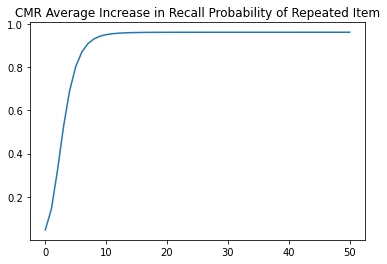

In [5]:
# selected parameters


free_parameters = [
    'encoding_drift_rate',
    'start_drift_rate',
    'recall_drift_rate',
    'shared_support',
    'item_support',
    'learning_rate',
    'primacy_scale',
    'primacy_decay',
    'stop_probability_scale',
    'stop_probability_growth',
    'choice_sensitivity']

result = [ 0.67729029,  0.0789752 ,  0.84475351,  0.32843236,  0.04606376,
        0.25014697,  4.09477771, 35.20917629,  0.03838687,  0.29442883,
        5.03376164]
parameters = {
    'item_count': 20,
    'presentation_count': 70
}

for i in range(len(free_parameters)):
    parameters[free_parameters[i]] = result[i]

results = np.zeros((experiment_count, 1+parameters['presentation_count']-parameters['item_count']))

for experiment in range(experiment_count):
    # arbitrary item and contextual cue
    repeated_item = np.random.randint(parameters['item_count'])
    cue = np.random.rand(parameters['item_count'] + 1)

    # initialize model
    model = CMR(**parameters)
    model.experience(np.eye(parameters['item_count'], parameters['item_count']))
    results[experiment, 0] = model.outcome_probabilities(cue)[repeated_item+1]
    
    # track outcome probability of selected item as it is repeatedly encoded
    for i in range(parameters['presentation_count']-parameters['item_count']):
        
        model.experience(np.eye(parameters['item_count'], parameters['item_count'])[repeated_item:repeated_item+1])
        
        #cue = model.context # for when i want context to be the cue
        results[experiment, i+1] = model.outcome_probabilities(cue)[repeated_item+1]
        
# plot an example trial    
#print('repeated item:\n', repeated_item, np.eye(parameters['item_count'], parameters['item_count'])[repeated_item:repeated_item+1])
#print('cue:\n', cue)
#print('outcome probability for repeated item:\n', results[-1])
#plot_states(model.mcf, "memory")

import matplotlib.pyplot as plt

plt.plot(np.mean(results, axis=0))
plt.title('CMR Average Increase in Recall Probability of Repeated Item')
plt.show()

The models seem to differ in the manner predicted. But whether this difference matters when it comes to fitting parameters to items only repeated a few times is ambiguous.

When we set feature_sensitivity to 20, for instance, the plot ends up looking pretty indistinguishable from CMR's scaling. Similarly, setting CMR's choice sensitivity parameter to a sufficiently low value produces scaling like we've initially observed from InstanceCMR.

Is there a trade-off that makes these modulations a bad idea? My initial fits with the murdock (1962) dataset suggest that it's complicated. My fitted choice sensitivity parameters for all versions of ICMR are pretty low values; they're much higher in CMR. So something about the architectures and the data may actually be exaggerating this difference I'm observing. Let's try out the parameters.

Finding that using parameters fitted to the Murdock dataset instead of using the same parameters across model architectures actually increases rather than moderates that difference I've shown you between how item repetitions impacts CMR and InstanceCMR's support for retrieving the repeated item. That is, the curve of item repetitions to retrieval supports is super steep for CMR and pretty linear for ICMR. Have to show this holds for other fits as well, but seems CMR might need to strongly enhance the contrast between well-supported and poorly-supported items to fit to behavioral data, which could lead it to overrate the impact of item repetitions on later recall. Unfortunately, I'm still unsure if the opposite holds instead; ICMR might underrate the impact of item repetitions on later retrieval. I need to hurry up and find out, and figure out how this connects back to Jamieson et al's (2018) critique of prototype-based models. 